In [78]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

# Background colour, two sample t-test
Dataset contains data with time taken reading a text on two different background colors (cyan, yellow). id identifies the test participan, 

In [4]:
df = pd.read_spss("background.sav")

In [32]:
# Rename faulty column name and drop id
df = df.rename(columns={"cyan": "colour"})
df = df.drop(columns=["id"])

In [12]:
# Encode cyan = 0, yellow = 1
df = df.replace({"cyan": 0, "yellow": 1})

In [33]:
df.groupby("colour").agg({'time': ['count', 'mean', 'std']})

time                        
       count        mean         std
colour                              
0         18  660.944444  202.038864
1         17  679.647059  159.386692

(array([2., 3., 1., 4., 2., 5.]),
 array([392.        , 477.66666667, 563.33333333, 649.        ,
        734.66666667, 820.33333333, 906.        ]),
 <BarContainer object of 6 artists>)

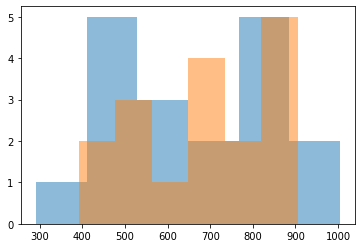

In [49]:
plt.hist(df.loc[df['colour']==0]['time'], bins='auto', label='cyan', alpha=0.5)
plt.hist(df.loc[df['colour']==1]['time'], bins='auto', label='yellow', alpha=0.5)

In [53]:
df.loc[df['colour']==0].describe()

,colour,time
count,18.0,18.000000
mean,0.0,660.944444
std,0.0,202.038864
min,0.0,291.000000
25%,0.0,475.750000
50%,0.0,649.500000
75%,0.0,827.250000
max,0.0,1005.000000


In [52]:
df.loc[df['colour']==1].describe()

,colour,time
count,17.0,17.000000
mean,1.0,679.647059
std,0.0,159.386692
min,1.0,392.000000
25%,1.0,559.000000
50%,1.0,695.000000
75%,1.0,833.000000
max,1.0,906.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x1de20849190>,
 'caps': [<matplotlib.lines.Line2D at 0x1de20849850>,
 'boxes': [<matplotlib.lines.Line2D at 0x1de2083bdf0>,
 'medians': [<matplotlib.lines.Line2D at 0x1de20849eb0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1de20857250>,
 'means': []}

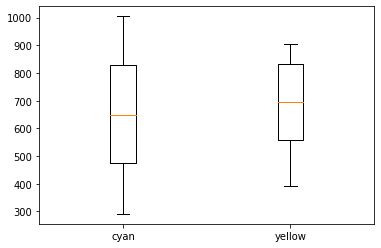

In [58]:
plt.boxplot([df.loc[df['colour']==0]['time'], df.loc[df['colour']==1]['time']], labels=['cyan', 'yellow'])

### Experiment
Let $\mu_c$ be mean reaction time for cyan, and $\mu_y$ mean reaction time for yellow. 

$H_0: \mu_c = \mu_y$
$H_1: \mu_c != \mu_y$

Using Welch's T-test to accept or reject the null hypothesis. The test statistic $Z$ is

$$Z \approx \frac{\hat{\mu_c} - \hat{\mu_y}}{\sqrt{\frac{\hat{\sigma_c}^2}{n_c} + \frac{\hat{\sigma_y}^2}{n_y}}} \sim N(0,1)$$

Where the denominator is the unpooled variance, meaning no assumption of equal variance between the two groups is made. 

In [76]:
# Compute sample statistics
c_agg = df.loc[df['colour']==0].agg({'time': ['mean', 'std', 'count']})
y_agg = df.loc[df['colour']==1].agg({'time': ['mean', 'std', 'count']})

mu_c = c_agg.loc['mean'][0]
s_c = c_agg.loc['std'][0]
n_c = c_agg.loc['count'][0]

mu_y = y_agg.loc['mean'][0]
s_y = y_agg.loc['std'][0]
n_y = y_agg.loc['count'][0]


display([mu_c, mu_y])
display([s_c, s_y])
display([n_c, n_y])

[660.9444444444445, 679.6470588235294]

[202.03886411871125, 159.38669218933813]

[18.0, 17.0]

In [114]:
# Compute Z statistic, which should be approximately normally distributed
Z = (mu_c - mu_y)/np.sqrt(s_c**2/n_c + s_y**2/n_y)
p = norm.cdf(Z) # Left side p-value
p_two = 2*p

0.76042707125211

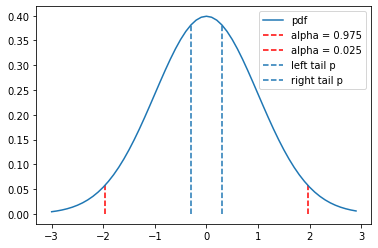

In [117]:
rng = np.arange(-3, 3, 0.1)
plt.plot(rng, norm.pdf(rng), label='pdf')
plt.vlines([norm.ppf(0.975)], ymin=0, ymax=norm.pdf(norm.ppf(0.975)), linestyles='dashed', label='alpha = 0.975', color='red')
plt.vlines([norm.ppf(0.025)], ymin=0, ymax=norm.pdf(norm.ppf(0.025)), linestyles='dashed', label='alpha = 0.025', color='red')
plt.vlines([norm.ppf(p)], ymin=0, ymax=norm.pdf(norm.ppf(p)), linestyles='dashed', label='left tail p')
plt.vlines([norm.ppf(1-p)], ymin=0, ymax=norm.pdf(norm.ppf(1-p)), linestyles='dashed', label='right tail p')
plt.legend()

### Results
Null hypothesis can clearly not be rejected, as the p-value for the two sided test is 0.76.